# Fashion MNIST Data Classification Project

# Step 1) Import Libraries

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

# Step 2) Load data

In [3]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


In [ ]:
# Print the shape of data

In [4]:
X_train.shape,y_train.shape, "***************" , X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***************', (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [8]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
# show image

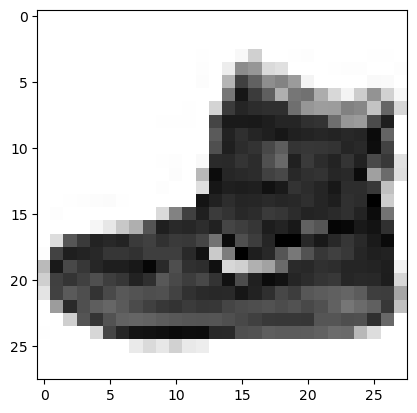

In [10]:
plt.imshow(X_train[0],cmap='Greys')

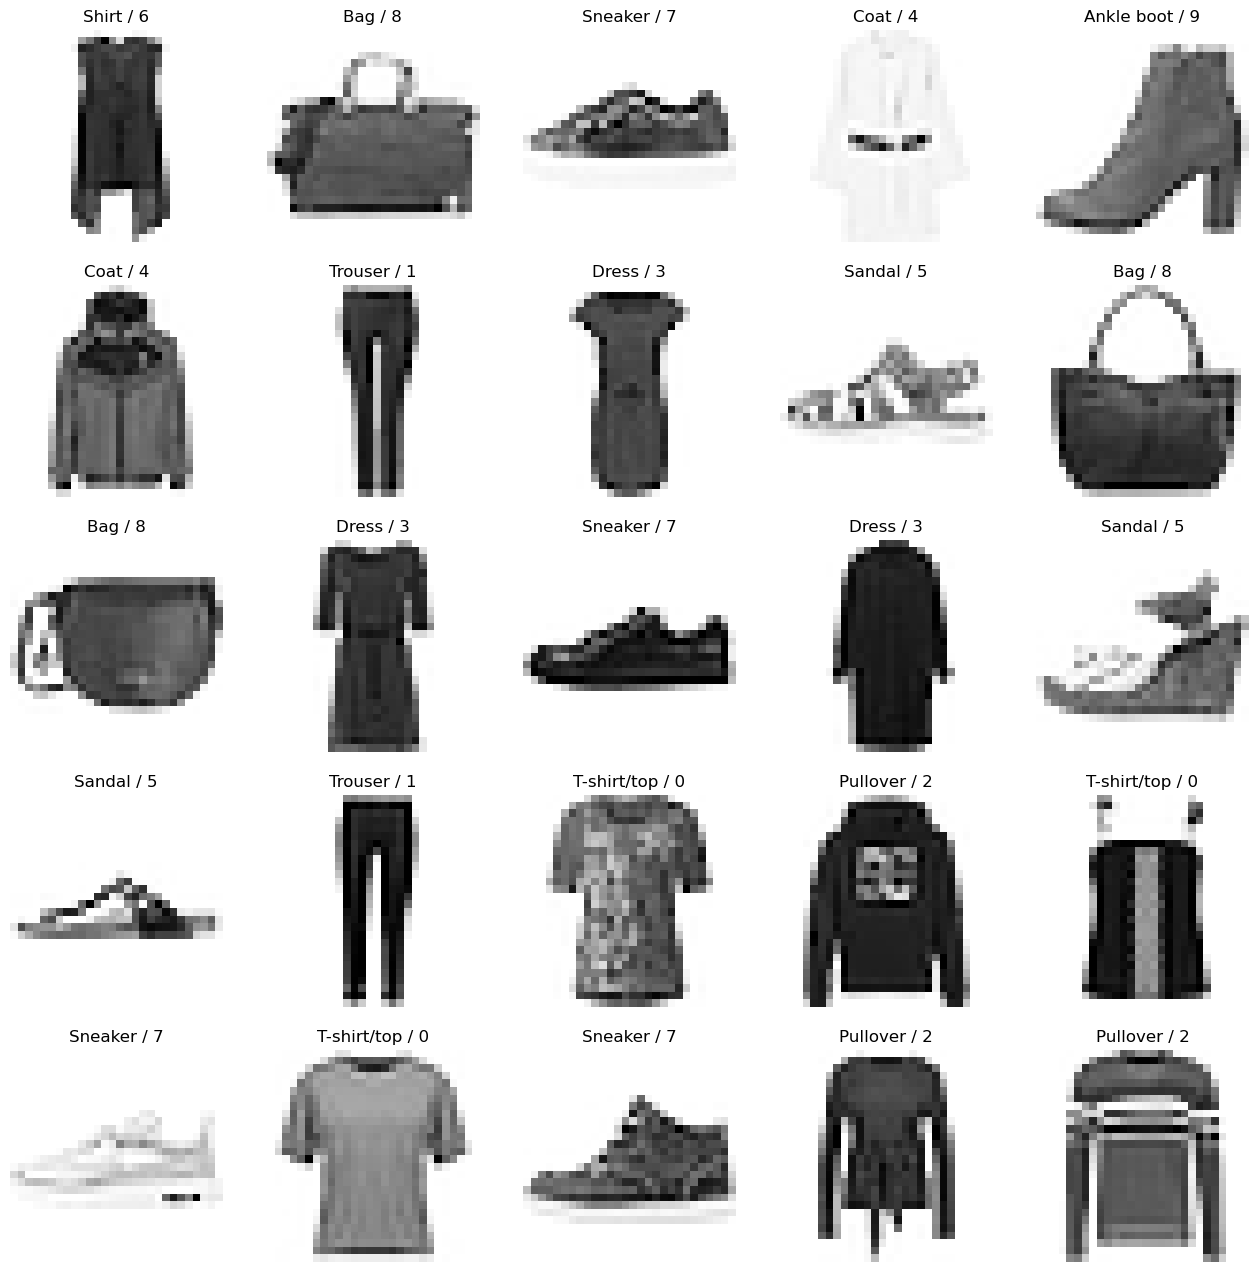

In [11]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [12]:
X_train.ndim

3

In [13]:
X_train = np.expand_dims(X_train,-1)

In [14]:
X_train.ndim

4

In [15]:
X_test=np.expand_dims(X_test,-1)

In [16]:
# feature scaling

In [17]:
X_train = X_train/255
X_test= X_test/255

In [18]:
# Split dataset

In [19]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [20]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# Step 3) Buiding the CNN model

In [21]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 28s 254ms/step - loss: 0.6332 - accuracy: 0.7849 - val_loss: 0.4278 - val_accuracy: 0.8529
Epoch 2/10
94/94 [==============================] - 22s 237ms/step - loss: 0.3872 - accuracy: 0.8645 - val_loss: 0.3733 - val_accuracy: 0.8701
Epoch 3/10
94/94 [==============================] - 23s 243ms/step - loss: 0.3411 - accuracy: 0.8809 - val_loss: 0.3539 - val_accuracy: 0.8759
Epoch 4/10
94/94 [==============================] - 22s 232ms/step - loss: 0.3093 - accuracy: 0.8915 - val_loss: 0.3227 - val_accuracy: 0.8857
Epoch 5/10
94/94 [==============================] - 20s 217ms/step - loss: 0.2890 - accuracy: 0.8977 - val_loss: 0.3118 - val_accuracy: 0.8907
Epoch 6/10
94/94 [==============================] - 22s 230ms/step - loss: 0.2711 - accuracy: 0.9043 - val_loss: 0.3001 - val_accuracy: 0.8954
Epoch 7/10
94/94 [==============================] - 26s 272ms/step - loss: 0.2530 - accuracy: 0.9098 - val_loss: 0.2877 - val_accuracy: 0.9007

In [25]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 6ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.14, 0.07, 0.01]], dtype=float32)

In [26]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2847 - accuracy: 0.8946


[0.2846760153770447, 0.894599974155426]

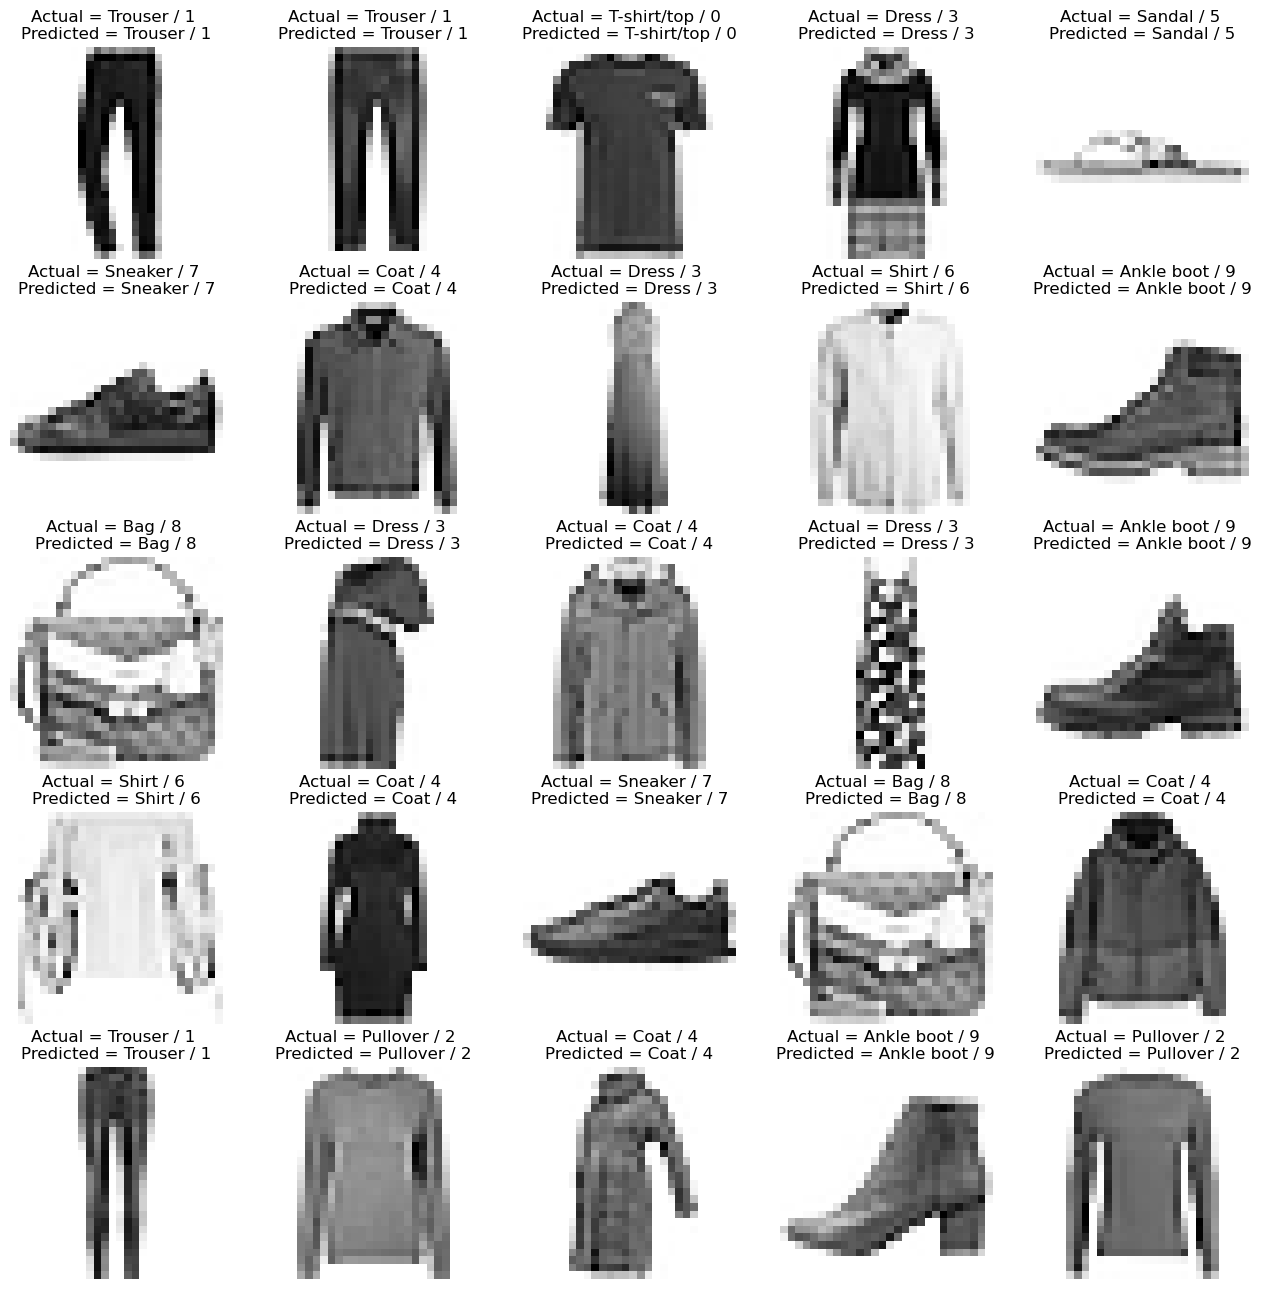

In [28]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

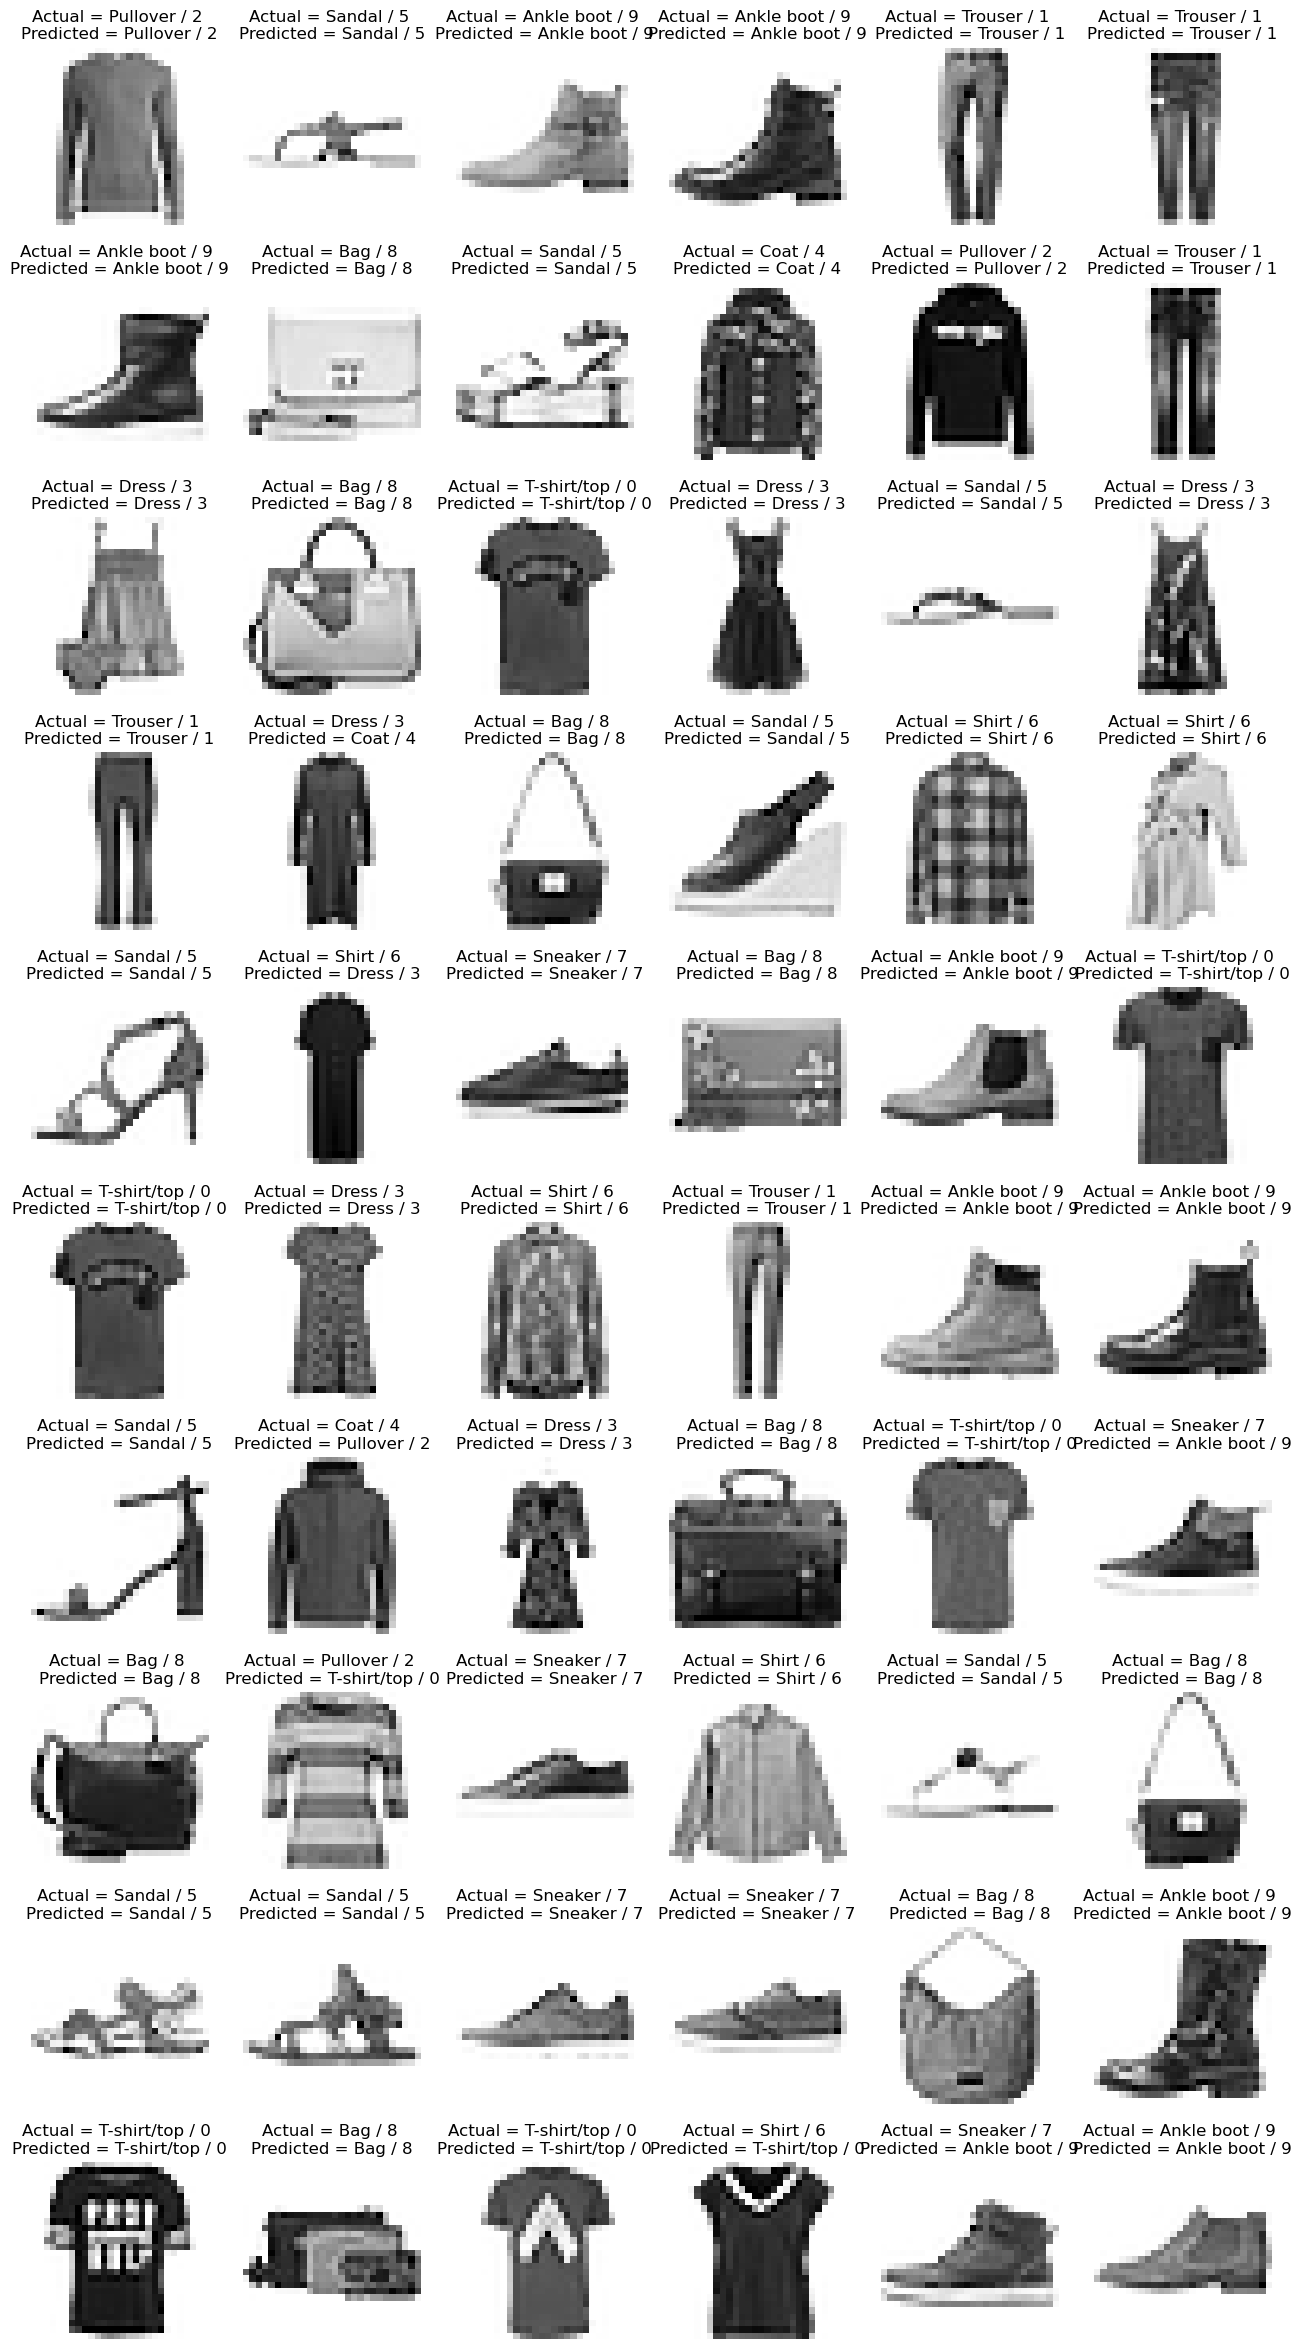

In [29]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [30]:
"""## Confusion Matrix"""

'## Confusion Matrix'

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.87      0.83      1000
       Dress       0.92      0.89      0.90      1000
        Coat       0.83      0.83      0.83      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.75      0.67      0.71      1000
     Sneaker       0.97      0.91      0.94      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.93      0.98      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



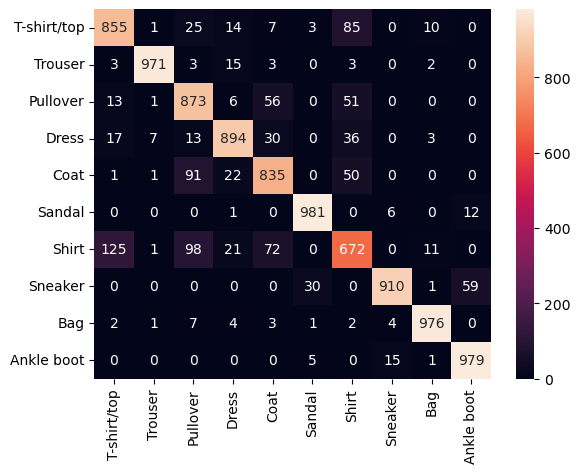

In [32]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [33]:
"""# Save Model"""

'# Save Model'

In [34]:

model.save('fashion_mnist_cnn_model.h5')

# Build 2 complex CNN

In [35]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')
cnn_model2.evaluate(X_test, y_test)

Epoch 1/20
94/94 [==============================] - 29s 296ms/step - loss: 1.0382 - accuracy: 0.6156 - val_loss: 0.5705 - val_accuracy: 0.7702
Epoch 2/20
94/94 [==============================] - 27s 286ms/step - loss: 0.5384 - accuracy: 0.7966 - val_loss: 0.4604 - val_accuracy: 0.8243
Epoch 3/20
94/94 [==============================] - 26s 280ms/step - loss: 0.4485 - accuracy: 0.8351 - val_loss: 0.4172 - val_accuracy: 0.8447
Epoch 4/20
94/94 [==============================] - 29s 305ms/step - loss: 0.3953 - accuracy: 0.8559 - val_loss: 0.3583 - val_accuracy: 0.8666
Epoch 5/20
94/94 [==============================] - 30s 314ms/step - loss: 0.3618 - accuracy: 0.8677 - val_loss: 0.3388 - val_accuracy: 0.8747
Epoch 6/20
94/94 [==============================] - 27s 286ms/step - loss: 0.3356 - accuracy: 0.8787 - val_loss: 0.3298 - val_accuracy: 0.8753
Epoch 7/20
94/94 [==============================] - 27s 286ms/step - loss: 0.3178 - accuracy: 0.8838 - val_loss: 0.3138 - val_accuracy: 0.8839

[0.275795578956604, 0.9064000248908997]

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.81      0.85      1000
       Dress       0.92      0.91      0.91      1000
        Coat       0.84      0.88      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.70      0.76      0.73      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



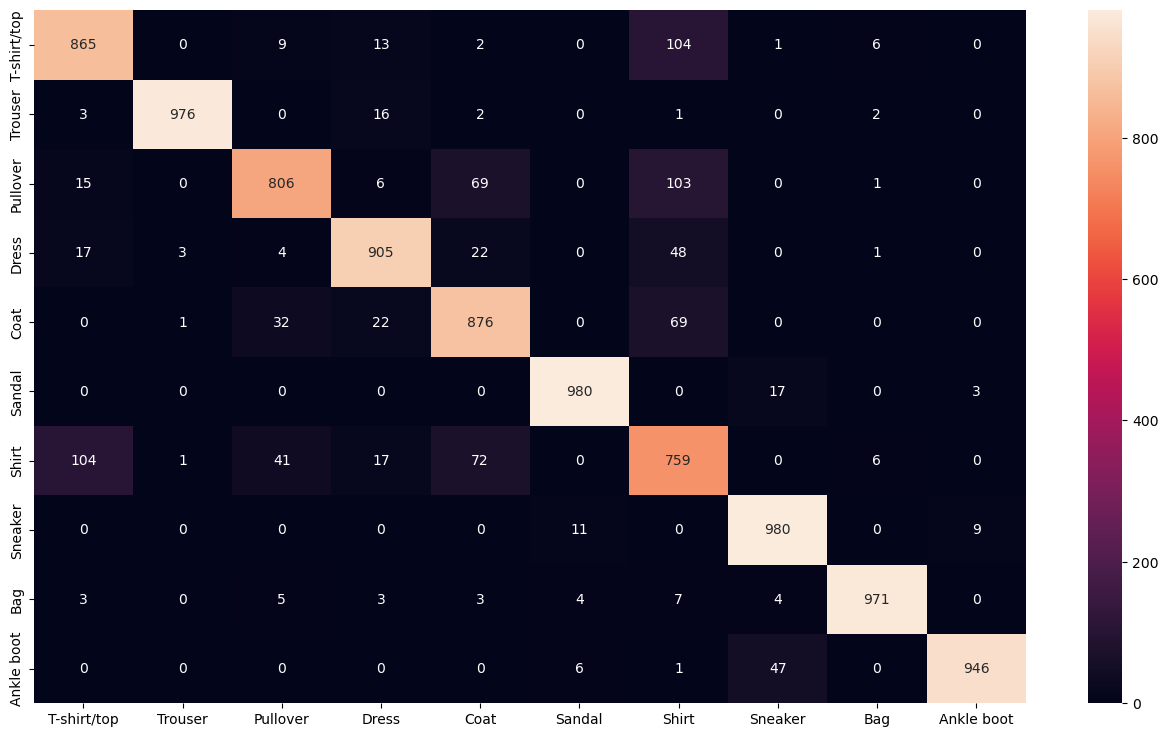

In [38]:
y_pred = cnn_model2.predict(X_test)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

In [42]:

"""######## very complex model"""
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1)

#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation),callbacks=[es])
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/50
94/94 [==============================] - 64s 661ms/step - loss: 1.1718 - accuracy: 0.5357 - val_loss: 0.6067 - val_accuracy: 0.7713
Epoch 2/50
94/94 [==============================] - 59s 627ms/step - loss: 0.5796 - accuracy: 0.7799 - val_loss: 0.4650 - val_accuracy: 0.8311
Epoch 2: early stopping
313/313 [==============================] - 5s 17ms/step - loss: 0.4780 - accuracy: 0.8200


[0.47799500823020935, 0.8199999928474426]

313/313 [==============================] - 5s 16ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.81      0.79      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.69      0.65      0.67      1000
       Dress       0.80      0.89      0.84      1000
        Coat       0.60      0.82      0.69      1000
      Sandal       0.95      0.97      0.96      1000
       Shirt       0.52      0.28      0.36      1000
     Sneaker       0.93      0.93      0.93      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.82     10000
   macro avg       0.81      0.82      0.81     10000
weighted avg       0.81      0.82      0.81     10000



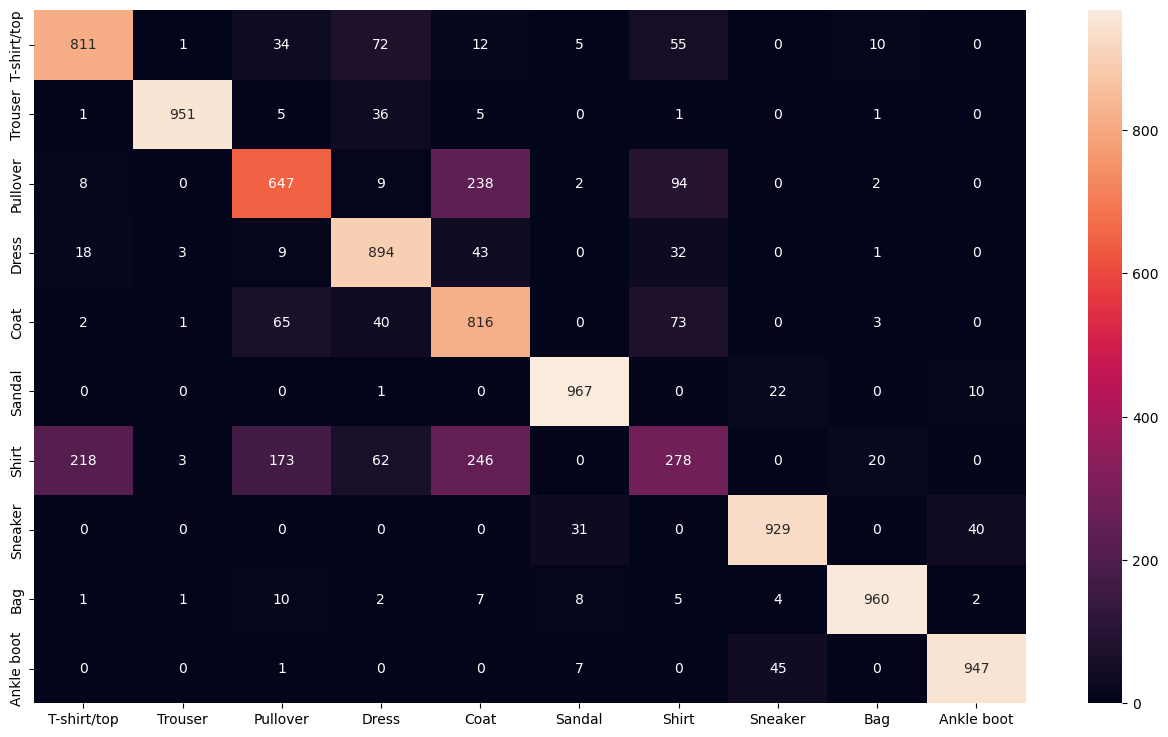

In [43]:
y_pred = cnn_model3.predict(X_test)
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)